In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.model_selection import train_test_split
import copy
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam
from sklearn.metrics import accuracy_score

In [2]:
# mnistデータ読み込み
mnist = keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# ラベルデータを01データに変換
y_train_ = np.zeros([60000, 10])
for i in range(60000):
    for j in range(10):
        if y_train[i] == j:
            y_train_[i, j] += 1
        else:
            continue
y_train = y_train_

y_test_ = np.zeros([10000, 10])
for i in range(10000):
    for j in range(10):
        if y_test[i] == j:
            y_test_[i, j] += 1
        else:
            continue
y_test = y_test_

print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (60000, 28, 28)
y_train :  (60000, 10)
X_test :  (10000, 28, 28)
y_test :  (10000, 10)


In [3]:
# 正規化
X_train = (X_train - X_train.min()) / X_train.max()
X_train = X_train.astype('float32')
X_test = (X_test - X_test.min()) / X_test.max()
X_test = X_test.astype('float32')

In [4]:
# 配列形式変更
X_train = X_train.reshape(-1,28,28,1)
print("X_train.shape=", X_train.shape)
X_test = X_test.reshape(-1,28,28,1)
print("X_test.shape=", X_test.shape)

X_train.shape= (60000, 28, 28, 1)
X_test.shape= (10000, 28, 28, 1)


2023-01-23 14:27:59.197284: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-01-23 14:27:59.197349: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-23 14:27:59.197378: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (user-managed-notebook-1674478105): /proc/driver/nvidia/version does not exist
2023-01-23 14:27:59.197708: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler f

Epoch 1/100


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


235/235 [==============================] - 25s 102ms/step - loss: 0.4861 - accuracy: 0.8635 - val_loss: 2.0183 - val_accuracy: 0.2325
Epoch 2/100
235/235 [==============================] - 23s 97ms/step - loss: 0.1202 - accuracy: 0.9676 - val_loss: 0.5506 - val_accuracy: 0.8184
Epoch 3/100
235/235 [==============================] - 23s 100ms/step - loss: 0.0797 - accuracy: 0.9779 - val_loss: 0.0764 - val_accuracy: 0.9770
Epoch 4/100
235/235 [==============================] - 23s 97ms/step - loss: 0.0612 - accuracy: 0.9835 - val_loss: 0.0620 - val_accuracy: 0.9809
Epoch 5/100
235/235 [==============================] - 23s 97ms/step - loss: 0.0497 - accuracy: 0.9861 - val_loss: 0.0534 - val_accuracy: 0.9845
Epoch 6/100
235/235 [==============================] - 23s 100ms/step - loss: 0.0415 - accuracy: 0.9885 - val_loss: 0.0475 - val_accuracy: 0.9844
Epoch 7/100
235/235 [==============================] - 23s 98ms/step - loss: 0.0358 - accuracy: 0.9904 - val_loss: 0.0442 - val_accuracy: 0

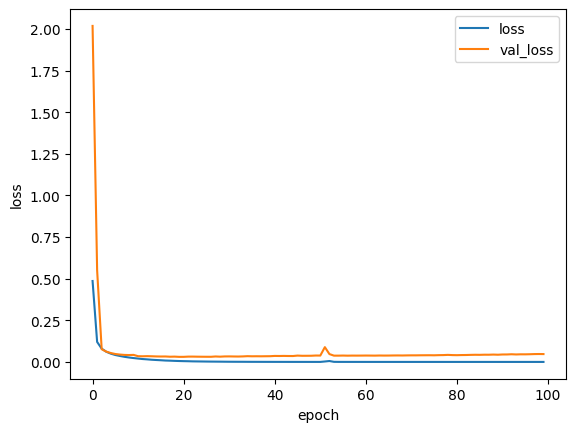

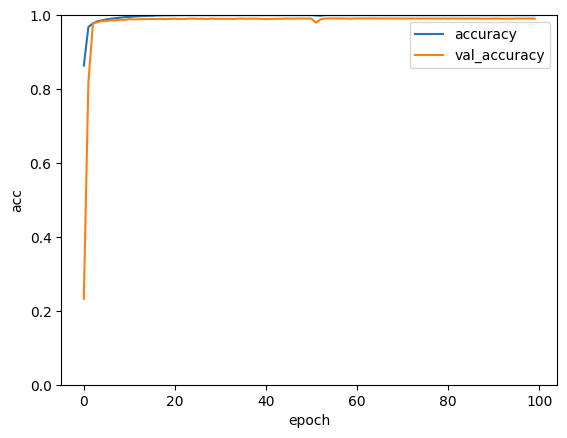

CPU times: user 3h 36min 39s, sys: 5min 48s, total: 3h 42min 27s
Wall time: 37min 36s


In [5]:
%%time
# モデルの設定
# モデルの定義
model = Sequential()


# 第一層（畳み込み層）
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 第二層（畳み込み層）
model.add(Conv2D(64, (5,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 第三層（relu）
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))

# 第四層（softmax）
model.add(Dense(10, activation='softmax'))

adam = Adam(lr=1e-4)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=["accuracy"])

# 学習
fit = model.fit(X_train, y_train,
          epochs=100,
          batch_size=256,validation_data=(X_test, y_test))

# 各epochにおける損失と精度をdata_NNに入れる
data_NN = pd.DataFrame(fit.history)

# グラフ化
data_NN[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

data_NN[["accuracy", "val_accuracy"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()

In [6]:
# 検証用データの精度
result = model.evaluate(X_test, y_test)
print(result)

313/313 [==============================] - 2s 6ms/step - loss: 0.0471 - accuracy: 0.9903
[0.04714343696832657, 0.9902999997138977]
